* 画像を読み込む 
* 顔検出 
* モデルで予測
* 結果の表示

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from face_rectangle import get_face_rect

In [2]:
#モデル読み込み
from keras.models import load_model

model=load_model('./images/model_asutama.h5')
model.summary()

2022-10-28 14:15:29.149458: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-28 14:15:48.115994: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                        

In [3]:
#テスト画像で検証
from PIL import Image

def detection(file):
    labels=["齋藤飛鳥", "玉森裕太"]
    #元の画像
    test_img=cv2.imread(file)
    test_img=cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    
    #元画像から顔部分切り取った画像
    face_img, d=get_face_rect(file)
    face_img=cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
    plt.imshow(face_img)
    plt.axis('off')
    plt.show()
    
    #データの型変換
    x_test=np.asarray(face_img)
    x_test=x_test.reshape(-1, 64, 64, 3)
    
    #元画像に顔部分の矩形を描画
    x1=int(d.left())
    y1=int(d.top())
    x2=int(d.right())
    y2=int(d.bottom())
    cv2.rectangle(test_img, (x1, y1), (x2, y2), color=(255,0,0), thickness=5)
    plt.imshow(test_img)
    plt.axis('off')
    plt.show()
    
    #モデルでの予測
    pred=model.predict(x_test)[0]
    print(pred[0])
    if pred[0]<0.5: 
        print("予測結果：", labels[0])
    else:
        print("予測結果：", labels[1])


./images/qrV7QlrOGQiTPC4UMrwZWdhdyAh-8KhSNksX1iGRCYQ.jpg
rectangles[[(419, 170) (740, 491)]]
rectangle(419,170,740,491)


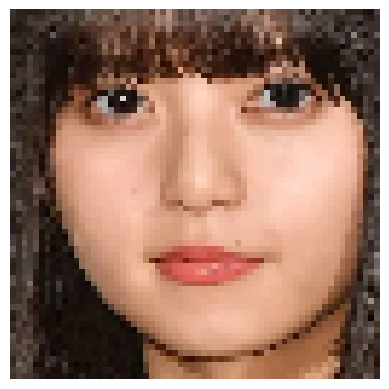

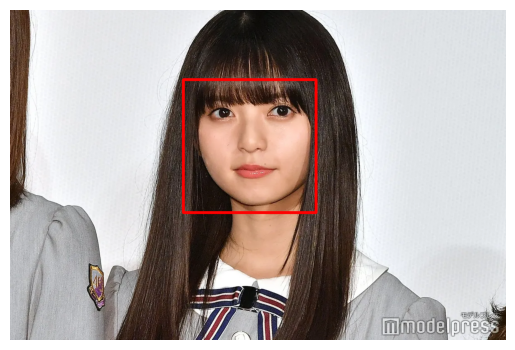

1/1 [==============================] - 0s 179ms/step
0.0
予測結果： 齋藤飛鳥
./images/S__2588701.jpg
rectangles[[(379, 260) (646, 528)]]
rectangle(379,260,646,528)


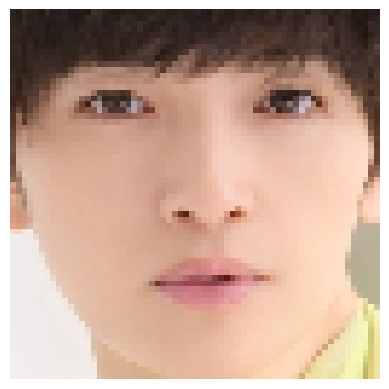

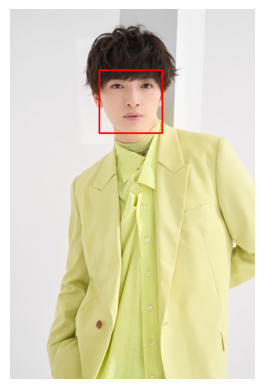

1/1 [==============================] - 0s 28ms/step
1.0
予測結果： 玉森裕太
./images/S__2588699.jpg
rectangles[[(153, 139) (282, 268)]]
rectangle(153,139,282,268)


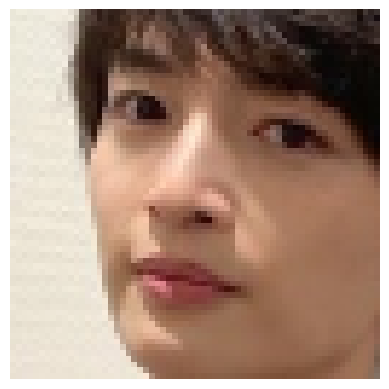

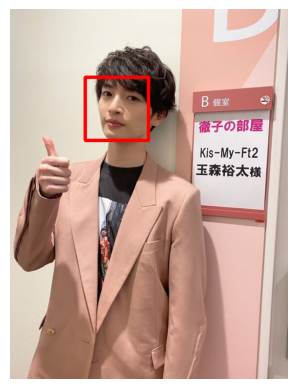

1/1 [==============================] - 0s 38ms/step
1.0
予測結果： 玉森裕太


In [4]:
import glob

fname=glob.glob("./images/*.jpg")
for f1 in fname:
    print(f1)
    detection(f1)

./images/test0/IMG_1684.png
rectangles[[(572, 160) (758, 345)]]
rectangle(572,160,758,345)


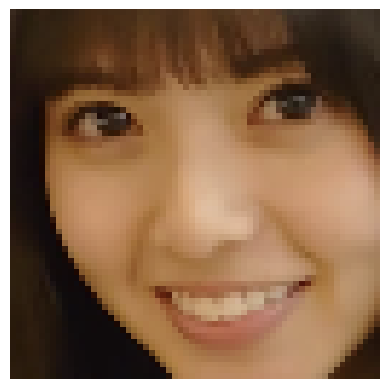

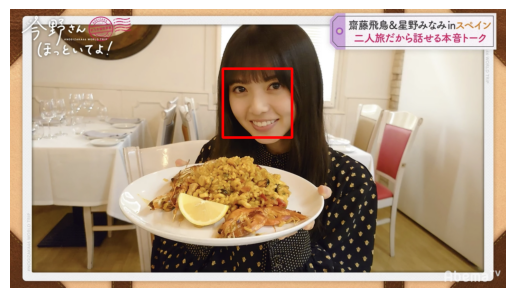

1/1 [==============================] - 0s 33ms/step
0.9999805
予測結果： 玉森裕太
./images/test0/IMG_1532.png
rectangles[[(799, 366) (985, 552)]]
rectangle(799,366,985,552)


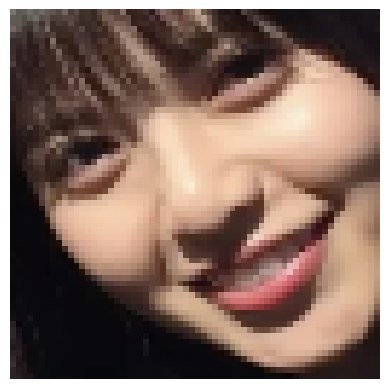

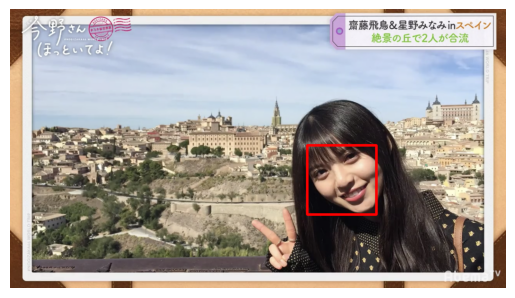

1/1 [==============================] - 0s 36ms/step
1.0
予測結果： 玉森裕太
./images/test0/IMG_1650.png
rectangles[[(494, 184) (648, 339)]]
rectangle(494,184,648,339)


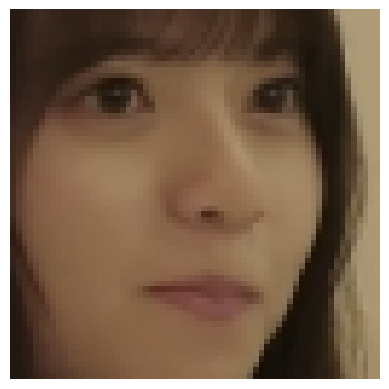

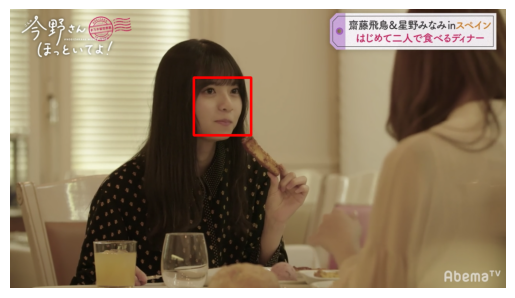

1/1 [==============================] - 0s 34ms/step
0.0
予測結果： 齋藤飛鳥
./images/test0/IMG_1365.png
rectangles[[(438, 201) (706, 468)]]
rectangle(438,201,706,468)


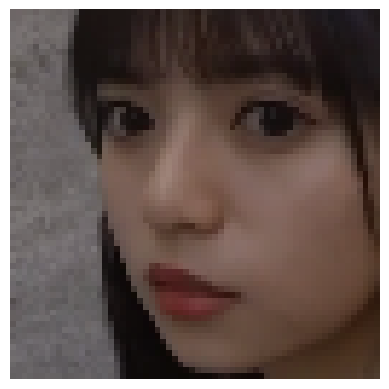

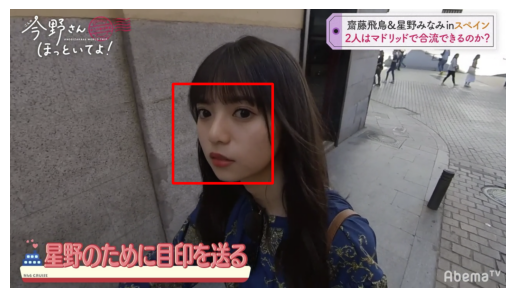

1/1 [==============================] - 0s 33ms/step
0.0
予測結果： 齋藤飛鳥
./images/test0/IMG_1466.png
rectangles[[(683, 282) (812, 411)]]
rectangle(683,282,812,411)


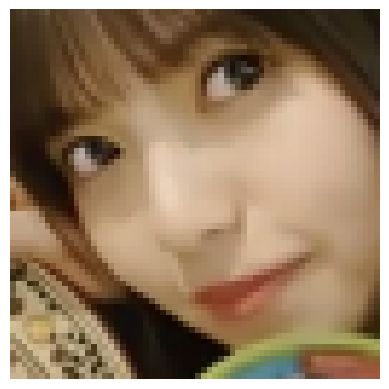

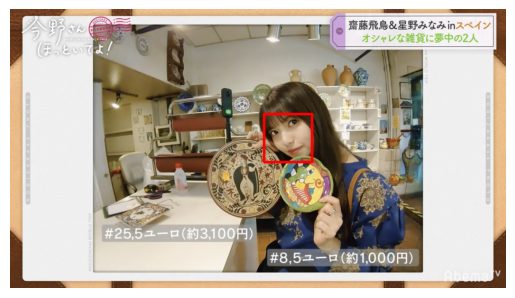

1/1 [==============================] - 0s 29ms/step
0.0
予測結果： 齋藤飛鳥
./images/test0/IMG_1488.png
rectangles[[(706, 171) (973, 439)]]
rectangle(706,171,973,439)


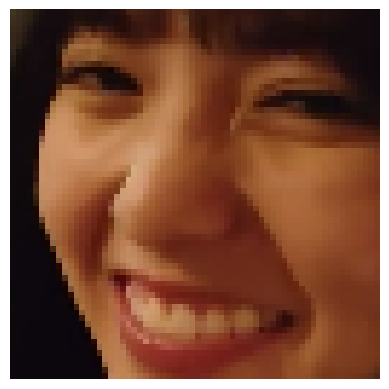

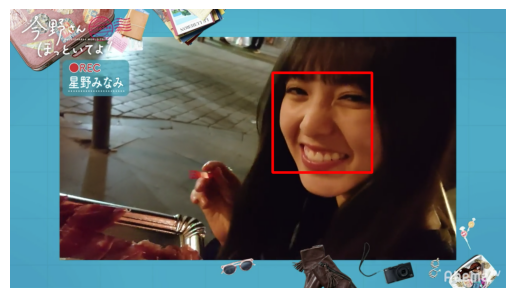

1/1 [==============================] - 0s 39ms/step
1.0
予測結果： 玉森裕太


In [119]:
fname=glob.glob("./images/test0/*.png")
for f0 in fname:
    print(f0)
    detection(f0)